In [6]:
# %pip install pandas
# %pip install SQLAlchemy
# %pip install pymysql
# %pip install pm4py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.9 MB/s eta 0:00:00a 0:00:01
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached intervaltree-3.1.0.tar.gz (32 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 57.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 91.7 MB/s eta 0:00:00:00:0100:01
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached pydotplus-2.0.2.tar.gz (278 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 59.8 MB/s eta 0:00:0000:0100:01
  Using cached StringDist-1.0.9.tar.gz (7.4 kB)
  Installing build dependencies ... done
  Getting requir

In [9]:
from sqlalchemy import create_engine
import pandas as pd
import os
import pm4py
# read mysql env v

In [10]:
mysql_user = os.environ['MYSQL_USER']
mysql_password = os.environ['MYSQL_PASSWORD']
mysql_host = os.environ['MYSQL_HOST']
mysql_db = os.environ['MYSQL_DB']

print(mysql_user, mysql_password, mysql_host, mysql_db)

# create connection string
db_connection_str = f'mysql+pymysql://{mysql_user}:{mysql_password}@{mysql_host}/{mysql_db}'
db_connection = create_engine(db_connection_str)

df = pd.read_sql('SELECT * FROM LAS2PEERMON.MESSAGE WHERE CASE_ID IS NOT NULL', con=db_connection)
df.head()



root root localhost:8085 LAS2PEERMON


,ID,EVENT,TIME_STAMP,SOURCE_NODE,SOURCE_AGENT,DESTINATION_NODE,DESTINATION_AGENT,REMARKS,CASE_ID,ACTIVITY_NAME,RESOURCE,RESOURCE_TYPE,LIFECYCLE_PHASE,TIME_OF_EVENT
0,236,SERVICE_CUSTOM_MESSAGE_2,2023-07-12 17:28:32,<0xF668F9..>,f7fe9a9dab81c2ea45c39cb432910714,,,"{""msg"": """"}",c16469ad-05aa-4cea-bfd8-cf7412caee1e,greeting:response,MensaBot,bot,start,2023-07-12 17:28:32
1,237,SERVICE_CUSTOM_MESSAGE_2,2023-07-12 17:28:32,<0xF668F9..>,f7fe9a9dab81c2ea45c39cb432910714,,,"{""msg"": """"}",c16469ad-05aa-4cea-bfd8-cf7412caee1e,greeting:response,MensaBot,bot,complete,2023-07-12 17:28:32
2,240,SERVICE_CUSTOM_MESSAGE_1,2023-07-12 17:28:32,<0xF668F9..>,f7fe9a9dab81c2ea45c39cb432910714,,,"{""user"": ""1d07d7c8a2d738b2354efa8653b8319b52db...",c16469ad-05aa-4cea-bfd8-cf7412caee1e,greeting,MensaBot,bot,start,2023-07-12 17:28:32
3,241,SERVICE_CUSTOM_MESSAGE_1,2023-07-12 17:28:32,<0xF668F9..>,f7fe9a9dab81c2ea45c39cb432910714,,,"{""user"": ""1d07d7c8a2d738b2354efa8653b8319b52db...",c16469ad-05aa-4cea-bfd8-cf7412caee1e,greeting,MensaBot,bot,complete,2023-07-12 17:28:32
4,246,SERVICE_CUSTOM_MESSAGE_2,2023-07-12 17:29:02,<0xF668F9..>,f7fe9a9dab81c2ea45c39cb432910714,,,"{""msg"": """"}",a6c7bab5-9a62-450f-a741-db7f5a34f5f9,menu:response,MensaBot,bot,start,2023-07-12 17:29:02


In [13]:
# rename columns CASE_ID->case:concept:name, ACTIVITY_NAME->concept:name, TIME_OF_EVENT->time:timestamp, LIFECYCLE_PHASE->lifecycle:transition
df.rename(columns={'CASE_ID': 'case:concept:name', 'ACTIVITY_NAME': 'concept:name', 'TIME_OF_EVENT': 'time:timestamp', 'LIFECYCLE_PHASE': 'lifecycle:transition'}, inplace=True)

df.head()


,ID,EVENT,TIME_STAMP,SOURCE_NODE,SOURCE_AGENT,DESTINATION_NODE,DESTINATION_AGENT,REMARKS,case:concept:name,concept:name,RESOURCE,RESOURCE_TYPE,lifecycle:transition,time:timestamp
0,236,SERVICE_CUSTOM_MESSAGE_2,2023-07-12 17:28:32,<0xF668F9..>,f7fe9a9dab81c2ea45c39cb432910714,,,"{""msg"": """"}",c16469ad-05aa-4cea-bfd8-cf7412caee1e,greeting:response,MensaBot,bot,start,2023-07-12 17:28:32
1,237,SERVICE_CUSTOM_MESSAGE_2,2023-07-12 17:28:32,<0xF668F9..>,f7fe9a9dab81c2ea45c39cb432910714,,,"{""msg"": """"}",c16469ad-05aa-4cea-bfd8-cf7412caee1e,greeting:response,MensaBot,bot,complete,2023-07-12 17:28:32
2,240,SERVICE_CUSTOM_MESSAGE_1,2023-07-12 17:28:32,<0xF668F9..>,f7fe9a9dab81c2ea45c39cb432910714,,,"{""user"": ""1d07d7c8a2d738b2354efa8653b8319b52db...",c16469ad-05aa-4cea-bfd8-cf7412caee1e,greeting,MensaBot,bot,start,2023-07-12 17:28:32
3,241,SERVICE_CUSTOM_MESSAGE_1,2023-07-12 17:28:32,<0xF668F9..>,f7fe9a9dab81c2ea45c39cb432910714,,,"{""user"": ""1d07d7c8a2d738b2354efa8653b8319b52db...",c16469ad-05aa-4cea-bfd8-cf7412caee1e,greeting,MensaBot,bot,complete,2023-07-12 17:28:32
4,246,SERVICE_CUSTOM_MESSAGE_2,2023-07-12 17:29:02,<0xF668F9..>,f7fe9a9dab81c2ea45c39cb432910714,,,"{""msg"": """"}",a6c7bab5-9a62-450f-a741-db7f5a34f5f9,menu:response,MensaBot,bot,start,2023-07-12 17:29:02


In [14]:

# to event log
pm4py.write_xes(df, 'test', case_id_key='case:concept:name')


/Users/lakhoune/Desktop/Repos/mobsos-event-log-generator/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
exporting log, completed traces :: 100%|██████████| 2/2 [00:00<00:00, 2472.33it/s]


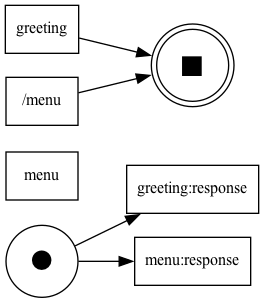

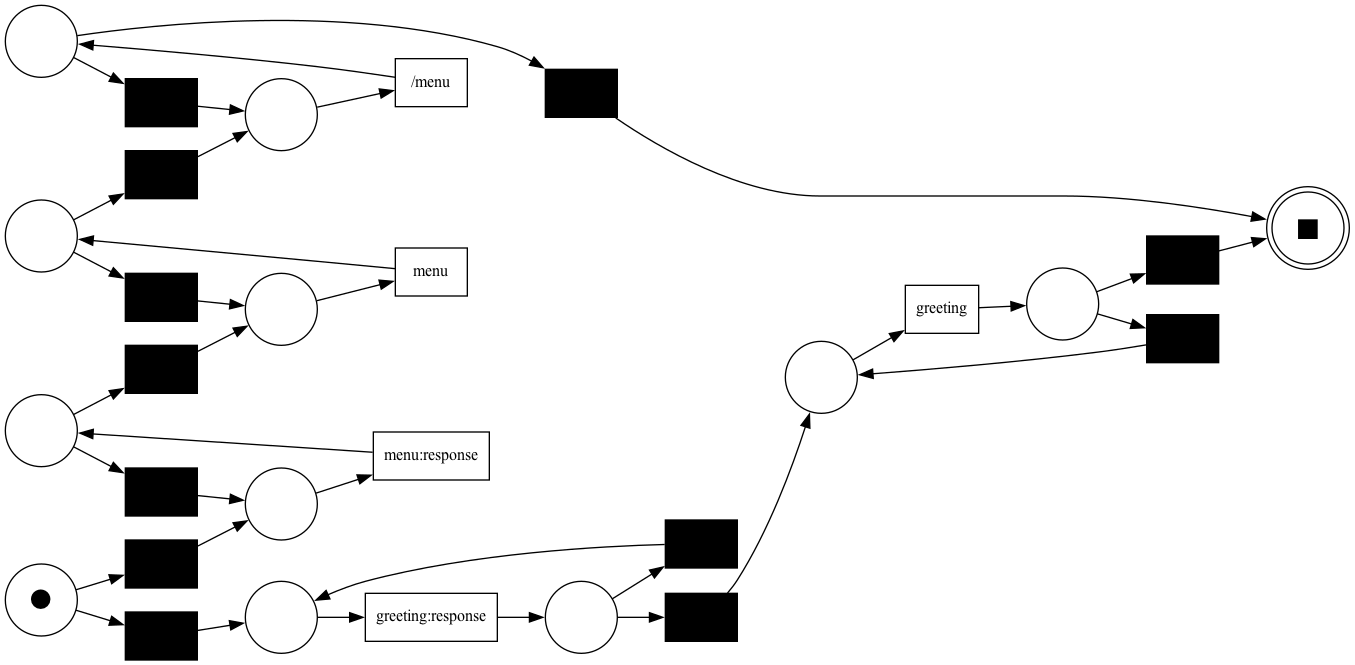

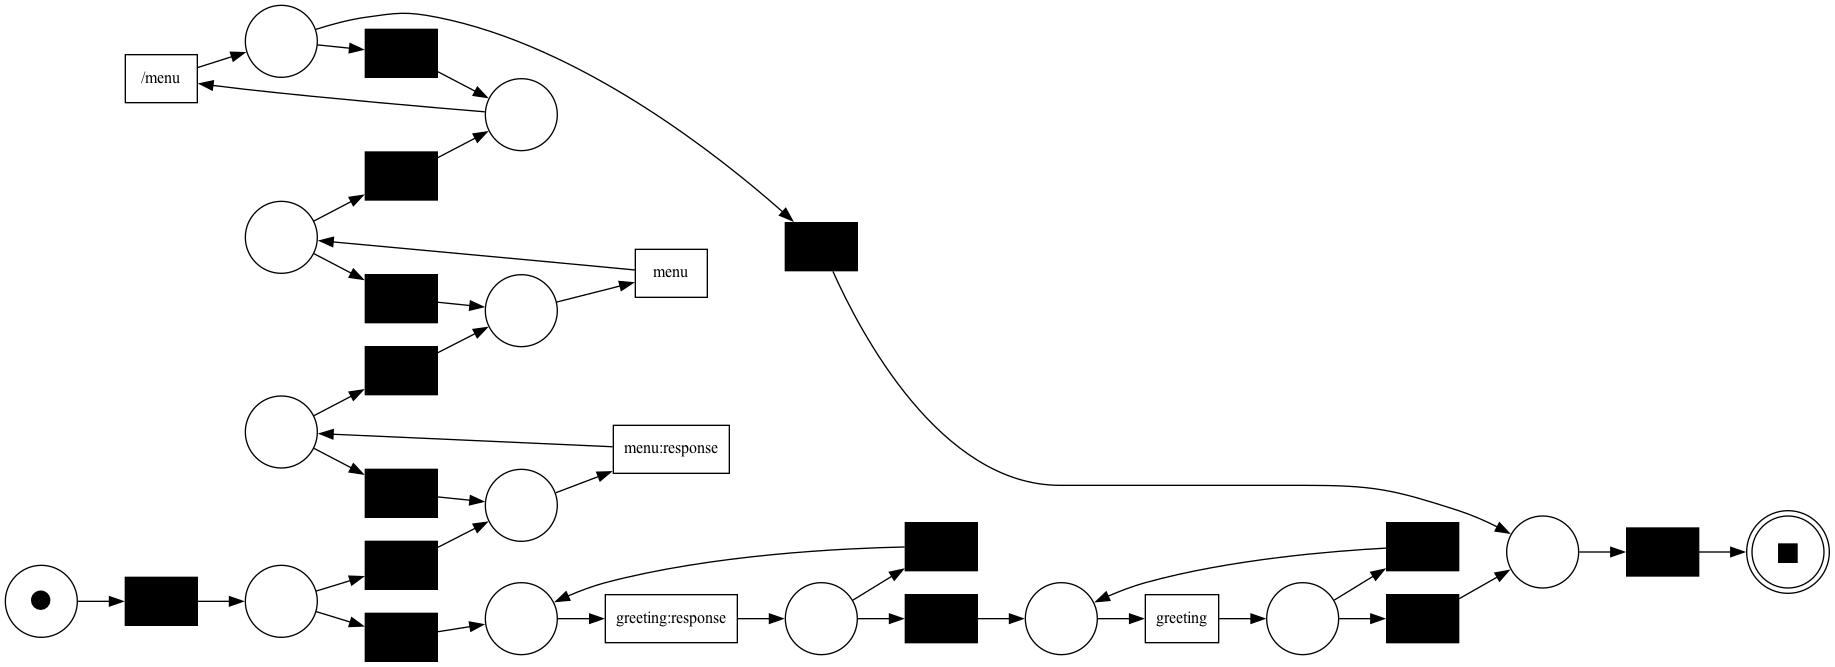

{('menu:response', 'menu:response', 'menu', 'menu', '/menu', '/menu'): 1,
 ('greeting:response', 'greeting:response', 'greeting', 'greeting'): 1}

In [16]:
# learn a bpmn model
petri_net_alpha, initial_marking_alpha, final_marking_alpha = pm4py.discovery.discover_petri_net_alpha(df)
petri_net_heuristics, initial_marking_heuristics, final_marking_heuristics = pm4py.discovery.discover_petri_net_heuristics(df)
petri_net_inductive, initial_marking_inductive, final_marking_inductive = pm4py.discovery.discover_petri_net_inductive(df, noise_threshold=0.2)

# visualize
pm4py.view_petri_net(petri_net_alpha, initial_marking_alpha, final_marking_alpha)
pm4py.view_petri_net(petri_net_heuristics, initial_marking_heuristics, final_marking_heuristics)
pm4py.view_petri_net(petri_net_inductive, initial_marking_inductive, final_marking_inductive)

variants = pm4py.get_variants(df)   
variants